In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd '/content/drive/MyDrive/'

/content/drive/MyDrive


Loading Libraries

In [4]:
#Import libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.metrics import mean_absolute_error, mean_squared_error



Loading the dataset


In [5]:
#Import dataset

df=pd.read_csv('AppleFinal.csv')
df.head(5)
df.tail()



,Date,Open,High,Low,Close,Adj Close,Volume,Compound,Neg,Neu,Pos
2512,2016-11-23,27.840000,27.877501,27.582500,27.807501,25.913099,109705600.0,0.000,0.000,0.000,0.0
2513,2016-11-25,27.782499,27.967501,27.737499,27.947500,26.043566,45903600.0,-0.899,0.115,0.885,0.0
2514,2016-11-28,27.857500,28.117500,27.847500,27.892500,25.992313,108776000.0,0.000,0.000,0.000,0.0
2515,2016-11-29,27.695000,28.007500,27.517500,27.865000,25.966688,114115200.0,0.000,0.000,0.000,0.0
2516,2016-11-30,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,0.0


Cleaning The Dataset


In [6]:
# Identifying and imputing missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2517 non-null   object 
 1   Open       2516 non-null   float64
 2   High       2516 non-null   float64
 3   Low        2516 non-null   float64
 4   Close      2516 non-null   float64
 5   Adj Close  2516 non-null   float64
 6   Volume     2516 non-null   float64
 7   Compound   2517 non-null   float64
 8   Neg        2517 non-null   float64
 9   Neu        2517 non-null   float64
 10  Pos        2517 non-null   float64
dtypes: float64(10), object(1)
memory usage: 216.4+ KB


In [19]:
#Feature Engineering

df = df.drop('Close', axis=1)
df=df[0:2516]
df.tail()

,Open,High,Low,Adj Close,Volume,Compound,Neg,Neu,Pos
Date,,,,,,,,,
2016-11-22,27.987499,28.105000,27.850000,26.045895,103862000.0,-0.8885,0.130,0.786,0.084
2016-11-23,27.840000,27.877501,27.582500,25.913099,109705600.0,0.0000,0.000,0.000,0.000
2016-11-25,27.782499,27.967501,27.737499,26.043566,45903600.0,-0.8990,0.115,0.885,0.000
2016-11-28,27.857500,28.117500,27.847500,25.992313,108776000.0,0.0000,0.000,0.000,0.000
2016-11-29,27.695000,28.007500,27.517500,25.966688,114115200.0,0.0000,0.000,0.000,0.000


In [21]:
#Converting "Date" to date time format
df['Date']= pd.to_datetime(df.Date)
df.info()

#Changing the datetime to the index
df.set_index("Date" , inplace=True)
df.head()

In [22]:
# Describe the dataset
df.describe()

,Open,High,Low,Adj Close,Volume,Compound,Neg,Neu,Pos
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03,2516.000000,2516.000000,2516.000000,2516.000000
mean,15.174888,15.320467,15.011446,13.344503,5.384197e+08,0.476229,0.049362,0.787795,0.086140
std,9.052898,9.118844,8.980969,8.276088,3.961938e+08,0.626596,0.036403,0.231945,0.043835
min,2.791071,2.901786,2.741786,2.370567,4.590360e+07,-0.997000,0.000000,0.000000,0.000000
25%,6.389911,6.464286,6.260893,5.419338,2.546993e+08,0.000000,0.024750,0.812000,0.060000
50%,14.285714,14.411250,14.117143,12.142335,4.312686e+08,0.823100,0.045000,0.852000,0.087000
75%,23.447500,23.643126,23.164375,20.511853,7.102949e+08,0.954650,0.069000,0.883000,0.113000
max,33.615002,33.634998,32.849998,29.941341,3.372970e+09,0.999200,0.363000,1.000000,0.283000


Visualization


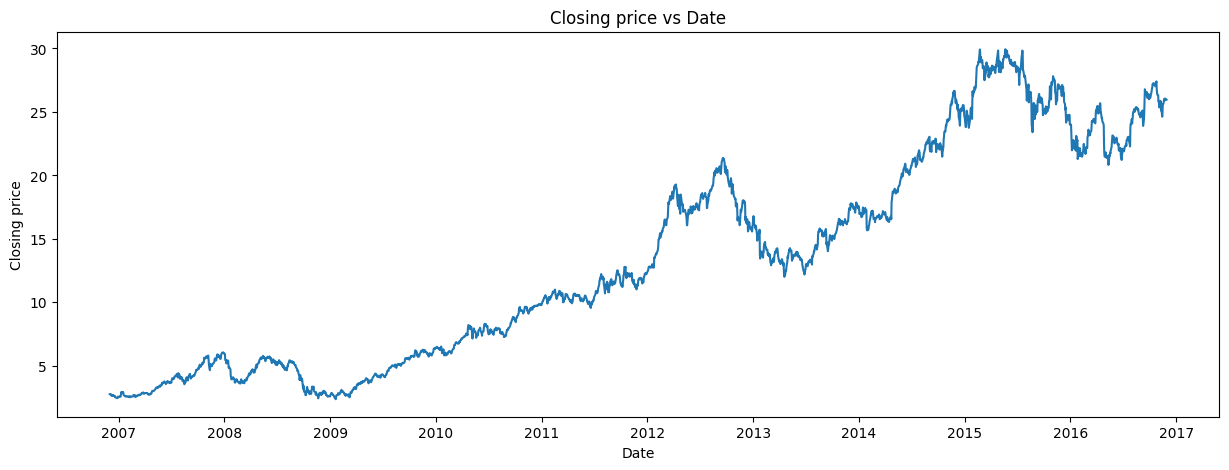

In [23]:
# Visualizing the data
# Simple plot
plt.figure(figsize=(15,5))
plt.plot(df['Adj Close'])
plt.xlabel("Date")
plt.ylabel("Closing price")
plt.title('Closing price vs Date')


plt.show()

Data Preprocessing

In [24]:
#Creating a new dataframe with only the close column
target= df.filter(['Adj Close']).values
features= df.drop('Adj Close', axis=1).values



In [25]:
#Scale the data
scaler = MinMaxScaler(feature_range= (0,1))
features = scaler.fit_transform(features)



In [27]:
#splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features,target,
                                                    test_size= 0.2,
                                                    random_state=0)

In [28]:

#Converting the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)


In [29]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2012, 8, 1)

In [30]:
# Build the model
model = Sequential()
model.add(Dense(64, input_dim= x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output layer (1 neuron for regression)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
#model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=1)

In [42]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit


# Define the number of splits (folds) for cross-validation
n_splits = 5
#Initialize TimeSeriesSplit for rolling cross-validation
tscv = TimeSeriesSplit(n_splits=n_splits)

# Initialize lists to store performance metrics
mse_scores = []
predictions=[]

# Iterate over the folds
for train_index, test_index in tscv.split(features):
    x_train, x_test = features[train_index], features[test_index]
    y_train, y_test = target[train_index], target[test_index]

    # Train your ANN model on X_train and y_train
    # Make predictions on X_test
    # Calculate mean squared error for this fold
    # Append the MSE to mse_scores
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    mse_scores.append(mse)

# Calculate and print the average MSE across all folds
average_mse = np.mean(mse_scores)
print(f'Average Mean Squared Error: {average_mse}')


14/14 [==============================] - 0s 3ms/step
Average Mean Squared Error: 0.16900532071939156


In [43]:
#Get the root mean squared error(RSME) and mean absolute error(MAE)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

rmse = np.sqrt( np.mean(predictions - y_test)** 2)
print("Root Mean Square Error", rmse)

Mean Absolute Error (MAE): 0.5220970663648803
Root Mean Square Error 0.46920537834804793


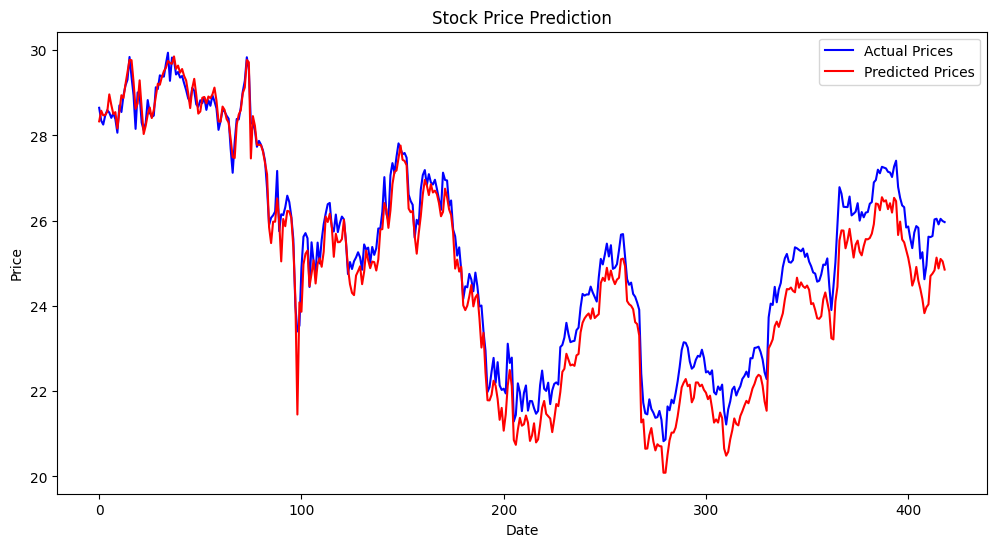

In [44]:
# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [45]:
validation= pd.DataFrame(y_test)
validation["Prediction"]= predictions
validation


,0,Prediction
0,28.649231,28.330719
1,28.347784,28.580547
2,28.255547,28.470709
3,28.471510,28.480844
4,28.592991,28.559147
...,...,...
414,26.045895,25.134056
415,25.913099,24.878893
416,26.043566,25.102026
417,25.992313,25.046591
